In [2]:
import numpy as np
import math
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
tackeLeva = np.array([[977, 605, 1], [1131, 659, 1], [854, 742, 1], [709, 673, 1],
                   [1111, 805, 1], [840, 902, 1], [708, 826, 1], [964, 739, 1],
                   [570, 796, 1], [769, 848, 1], [484, 1065, 1], [249, 980, 1],
                   [773, 944, 1], [495, 1184, 1], [265, 1089, 1], [580, 886, 1]])

tackeDesna = np.array([[1267, 831, 1], [1194, 949, 1], [723, 880, 1], [839, 785, 1],
                   [1176, 1147, 1], [741, 1050, 1], [843, 924, 1], [1253, 1021, 1],
                   [652, 844, 1], [600, 942, 1], [195, 949, 1], [295, 853, 1],
                   [616, 1037, 1], [221, 1042, 1], [302, 940, 1], [668, 984, 1]])

In [4]:
pts1 =  np.array([1,-1,-1])*(np.array([1600,0,0]) -  tackeLeva)
pts2 =  np.array([1,-1,-1])*(np.array([1600,0,0]) -  tackeDesna)


def fundamentalnaMatricaF(pts1, pts2):
    jed = []
    n = pts1.shape[0]
    
    for i in range(n):
        p1 = pts1[i]
        p2 = pts2[i]
        jed.append([p1[0]*p2[0], p1[0]*p2[1], p1[0]*p2[2], p1[1]*p2[0], p1[1]*p2[1], p1[1]*p2[2], p1[2]*p2[0], p1[2]*p2[1], p1[2]*p2[2]])
    jne = np.array(jed)
    U, D, V = np.linalg.svd(jne)
    F = (V[-1] / V[-1, -1]).reshape(3,3).T
    U1, D1, V1 = np.linalg.svd(F)
    D1[2] = 0
    D1 = np.diag(D1)
    F = U1 @ D1 @ V1
    return F


In [5]:
F = fundamentalnaMatricaF(pts1, pts2)

def dekompozicijaE(F):
    K = np.array([[1605, 0, 1600/2], [0, 1500, 1200/2], [0, 0, 1]])
    E = K.T @ F @ K
    U, S, V = np.linalg.svd(-E)
  
    E0 = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 0]])
    Q0 = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
    Ec = U @ E0 @ U.T
    AA = U @ Q0 @ V
    if np.linalg.det(AA) < 0:
        AA = -AA
    CC = np.array([Ec[2,1], Ec[0,2], Ec[1,0]])
    T1 = np.concatenate((K @ AA, (K @ CC).reshape(3, 1)), axis=1)
    C2 = -AA.T @ CC
    return E, Ec, AA, CC, T1, C2

E, Ec, AA, CC, T1, C2 = dekompozicijaE(F)
EcAA = Ec @ AA
E_scaled = (E[0, 0] / EcAA[0, 0]) * EcAA
T2 = np.array([[63, 0, 1600/2, 0], [0, 60, 1200/2, 0], [0, 0, 1, 0]])

In [6]:
def triangulacija(T1, T2, M1, M2):
    jedM = np.array([
        M1[1] * T1[2] - M1[2] * T1[1],
        -M1[0] * T1[2] + M1[2] * T1[0],
        M2[1] * T2[2] - M2[2] * T2[1],
        -M2[0] * T2[2] + M2[2] * T2[0]
    ])
    _, _, Vh = np.linalg.svd(jedM)
    M = Vh[-1]/Vh[-1,-1]
    return M

pts = []
n = len(pts1)
for i in range(n):
    M = triangulacija(T1, T2, pts1[i], pts2[i])
    pts.append(M)

In [8]:
np.set_printoptions(precision=6, suppress=True)

In [12]:
print("F:\n", F)
print("E:\n", E)
print("Eo:\n", Ec)
print("A:\n", AA)
print("T1:\n", T1)
print("T2\n", T2)
print("3D koordinate:\n", np.array(pts))

F:
 [[ 0.       -0.000001  0.000171]
 [ 0.        0.000001 -0.001278]
 [-0.000745 -0.000364  1.      ]]
E:
 [[ 0.810084 -1.289628  0.162267]
 [ 1.136093  2.205475 -0.468958]
 [-0.337724 -0.306514  0.07883 ]]
Eo:
 [[ 0.        0.971697 -0.204347]
 [-0.971697  0.        0.118517]
 [ 0.204347 -0.118517  0.      ]]
A:
 [[-0.613031 -0.733162  0.29439 ]
 [ 0.789924 -0.561914  0.245505]
 [-0.014573  0.383048  0.923613]]
T1:
 [[-995.573224 -870.287317 1211.387197 -967.578005]
 [1176.142815 -613.041612  922.425098 -889.53888 ]
 [  -0.014573    0.383048    0.923613   -0.971697]]
T2
 [[ 63.   0. 800.   0.]
 [  0.  60. 600.   0.]
 [  0.   0.   1.   0.]]
3D koordinate:
 [[ 0.012386 -0.346924 -0.017241  1.      ]
 [-0.089464 -0.418214 -0.021264  1.      ]
 [-0.014043 -0.217989 -0.04422   1.      ]
 [ 0.086444 -0.173502 -0.06019   1.      ]
 [-0.160019 -0.325795 -0.014517  1.      ]
 [-0.090822 -0.128185 -0.018259  1.      ]
 [ 0.003769 -0.091584 -0.016731  1.      ]
 [-0.056874 -0.270089 -0.012707  

In [10]:
def prikazKocke(temena, ivice1, ivice2, C2):
    temena1 = temena[:8]
    xdata = (np.transpose(temena1))[0]
    ydata = (np.transpose(temena1))[1]
    zdata = (np.transpose(temena1))[2]
    data1 = []
    
    n = len(ivice1)
    
    for i in range(n):
        data1.append(go.Scatter3d(x=[xdata[ivice1[i][0]], xdata[ivice1[i][1]]], y=[ydata[ivice1[i][0]], ydata[ivice1[i][1]]],z=[zdata[ivice1[i][0]], zdata[ivice1[i][1]]]))
    
    temena2 = temena[8:]
    xdata = (np.transpose(temena2))[0]
    ydata = (np.transpose(temena2))[1]
    zdata = (np.transpose(temena2))[2]
    
    for i in range(n):
        data1.append(go.Scatter3d(x=[xdata[ivice1[i][0]], xdata[ivice1[i][1]]], y=[ydata[ivice1[i][0]], ydata[ivice1[i][1]]],z=[zdata[ivice1[i][0]], zdata[ivice1[i][1]]]))

    data1.append(go.Scatter3d(x=[C2[0]], y=[C2[1]], z=[C2[2]],
                                 mode='markers+text', text=["Kamera 2"],
                                 marker=dict(size=8, color='orange', symbol='diamond')))
    fig = go.Figure(data = data1 )
    fig.update_layout(
        scene=dict(aspectmode='data',
            xaxis=dict(title='X (mm/pix)'),
            yaxis=dict(title='Y (mm/pix)'),
            zaxis=dict(title='Z (mm/pix)'),),
        margin=dict(l=0, r=0, b=0, t=0),title="3D Rekonstrukcija")
    fig. update_layout(showlegend=False)
    fig.show()

T1

pts = []
for i in range(0, len(pts1)):
    M = triangulacija(T1, T2, pts1[i], pts2[i])
    pts.append(M)

temena = np.array(pts)
ivice1 = [[0,1],[1,2],[2,3],[3,0],[4,5],[5,6],[6,7],[7,4],[0,7],[1,4],[2,5],[3,6]]
ivice2 = [[8,9],[9,10],[10,11],[11,8],[15,12],[12,13],[13,14], [14,15],[8,15],[9,12],[10,13],[11,14]]

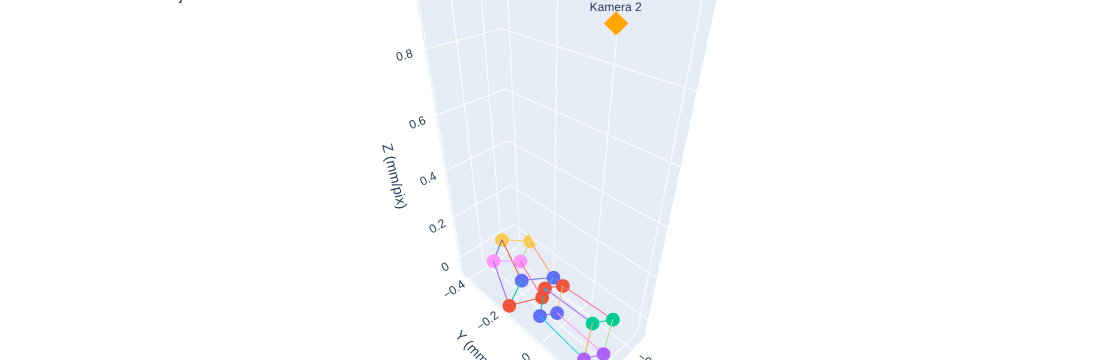

In [11]:
prikazKocke(temena, ivice1, ivice2, C2)